In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import PrecisionRecallDisplay
import os
import matplotlib.pyplot as plt

In [2]:
path = '../Data/model_predictions/'
predictions = []
names = []
prediction_list = os.listdir(path)
prediction_list.sort()
for prediction_csv in prediction_list:
    if prediction_csv[0] != '.':
        names.append(prediction_csv.split("_")[0])
        file_path = os.path.join(path,prediction_csv)
        predictions.append(pd.read_csv(file_path).iloc[:,1].to_numpy())

result_df = pd.DataFrame({"model": names, "predictions": predictions})
result_df.set_index('model', inplace=True)
result_df

,predictions
model,
CNN,"[0.9999614, 0.019919384, 0.9997076, 0.9999548,..."
FFNN,"[5.7857265, -2.3130398, 9.792531, 11.198541, -..."
KNN,"[1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.4, 0.2, 0.8, ..."
KmeansRNN,"[0.9999566, 0.00032623045, 0.99995005, 0.99996..."
LDA,"[9.922838406208689, -7.818123237839856, 15.238..."
LogisticRegression,"[0.9887138, 0.0950883, 0.99762434, 0.99559057,..."
RNN,"[0.99986553, 0.017770391, 0.99976987, 0.999919..."
SVM,"[1.2273785097678118, -1.4666302688681505, 1.89..."
y,"[1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, ..."


(0.53, 1.02)

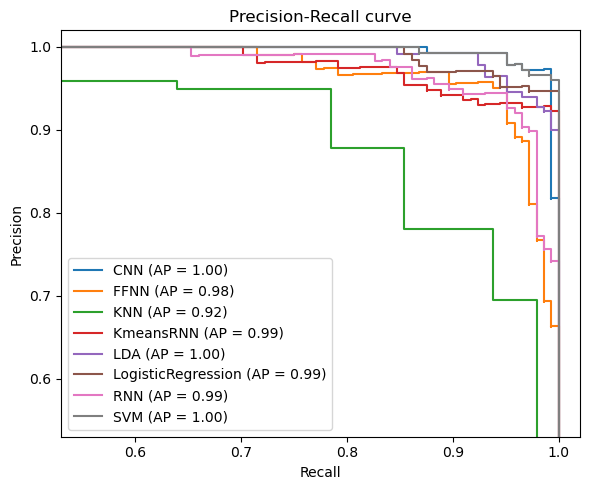

In [14]:
fig, ax = plt.subplots(figsize=(6,5))
y_test = result_df.loc['y'].to_list()[0]
for model in names:
    if model != 'y':
        y_pred_prob = result_df.loc[model].to_list()[0]
        PrecisionRecallDisplay.from_predictions(y_test, y_pred_prob, name=model, ax=ax)
ax.set_title("Precision-Recall curve")
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.set_xlim(0.53,1.02)
ax.set_ylim(0.53,1.02)